In [8]:
import json
import os
import sys
import time
import pandas as pd

In [5]:
with open('my-basic-fit-data.json') as f:
    bfdata = json.load(f)

In [66]:
bfdata['visits']
df = pd.DataFrame(bfdata['visits'])
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%d-%m-%Y %H:%M')
df = df.drop(['date', 'time'], axis=1)
df['datetime'] = df['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Brussels')
df

,club,datetime
0,Basic-Fit Liège Rue de l’Universite 24/7,2024-01-19 07:39:00+01:00
1,Basic-Fit Liège Rue de l’Universite 24/7,2024-01-18 07:53:00+01:00
2,Basic-Fit Liège Rue de l’Universite 24/7,2024-01-17 07:37:00+01:00
3,Basic-Fit Liège Rue de l’Universite 24/7,2024-01-15 06:35:00+01:00
4,Basic-Fit Liège Rue de l’Universite 24/7,2024-01-15 06:35:00+01:00
...,...,...
386,Basic-Fit Liège Rue de l’Universite 24/7,2021-12-08 20:04:00+01:00
387,Basic-Fit Liège Rue de l’Universite 24/7,2021-12-05 15:13:00+01:00
388,Basic-Fit Liège Rue de l’Universite 24/7,2021-12-03 14:58:00+01:00
389,Basic-Fit Liège Rue de l’Universite 24/7,2021-11-29 18:17:00+01:00


In [78]:
# Merge rows whose datetime are two close (1 hour)
df2 = df.groupby(pd.Grouper(key='datetime', freq='1H'))
# Aggregate to keep only one for each where there is one
df2 = df2.agg({'club': 'first', 'datetime': 'first'})
# Drop NA
df2 = df2.dropna()
df2

,club,datetime
datetime,,
2021-11-22 17:00:00+01:00,Basic-Fit Liège Rue de l’Universite 24/7,2021-11-22 17:59:00+01:00
2021-11-29 18:00:00+01:00,Basic-Fit Liège Rue de l’Universite 24/7,2021-11-29 18:17:00+01:00
2021-12-03 14:00:00+01:00,Basic-Fit Liège Rue de l’Universite 24/7,2021-12-03 14:58:00+01:00
2021-12-05 15:00:00+01:00,Basic-Fit Liège Rue de l’Universite 24/7,2021-12-05 15:13:00+01:00
2021-12-08 20:00:00+01:00,Basic-Fit Liège Rue de l’Universite 24/7,2021-12-08 20:04:00+01:00
...,...,...
2024-01-14 07:00:00+01:00,Basic-Fit Liège Rue de l’Universite 24/7,2024-01-14 07:57:00+01:00
2024-01-15 06:00:00+01:00,Basic-Fit Liège Rue de l’Universite 24/7,2024-01-15 06:34:00+01:00
2024-01-17 07:00:00+01:00,Basic-Fit Liège Rue de l’Universite 24/7,2024-01-17 07:37:00+01:00


In [77]:
df2_gb = df2.groupby(pd.Grouper(key='datetime', freq='1D'))
for name, group in df2_gb:
    if len(group.index) > 1:
        print(name)
        print(group['datetime'])
        print()
df3 = df2_gb.agg({'club': 'first', 'datetime': 'first'}).dropna()
df3

2022-07-25 00:00:00+02:00
datetime
2022-07-25 09:00:00+02:00   2022-07-25 09:40:00+02:00
2022-07-25 10:00:00+02:00   2022-07-25 10:55:00+02:00
Name: datetime, dtype: datetime64[ns, Europe/Brussels]

2022-07-27 00:00:00+02:00
datetime
2022-07-27 13:00:00+02:00   2022-07-27 13:22:00+02:00
2022-07-27 18:00:00+02:00   2022-07-27 18:28:00+02:00
Name: datetime, dtype: datetime64[ns, Europe/Brussels]

2022-10-19 00:00:00+02:00
datetime
2022-10-19 06:00:00+02:00   2022-10-19 06:34:00+02:00
2022-10-19 08:00:00+02:00   2022-10-19 08:29:00+02:00
Name: datetime, dtype: datetime64[ns, Europe/Brussels]

2022-11-04 00:00:00+01:00
datetime
2022-11-04 06:00:00+01:00   2022-11-04 06:51:00+01:00
2022-11-04 17:00:00+01:00   2022-11-04 17:52:00+01:00
Name: datetime, dtype: datetime64[ns, Europe/Brussels]

2022-12-16 00:00:00+01:00
datetime
2022-12-16 09:00:00+01:00   2022-12-16 09:12:00+01:00
2022-12-16 14:00:00+01:00   2022-12-16 14:29:00+01:00
Name: datetime, dtype: datetime64[ns, Europe/Brussels]

2023-

,club,datetime
datetime,,
2021-11-22 00:00:00+01:00,Basic-Fit Liège Rue de l’Universite 24/7,2021-11-22 17:59:00+01:00
2021-11-29 00:00:00+01:00,Basic-Fit Liège Rue de l’Universite 24/7,2021-11-29 18:17:00+01:00
2021-12-03 00:00:00+01:00,Basic-Fit Liège Rue de l’Universite 24/7,2021-12-03 14:58:00+01:00
2021-12-05 00:00:00+01:00,Basic-Fit Liège Rue de l’Universite 24/7,2021-12-05 15:13:00+01:00
2021-12-08 00:00:00+01:00,Basic-Fit Liège Rue de l’Universite 24/7,2021-12-08 20:04:00+01:00
...,...,...
2024-01-14 00:00:00+01:00,Basic-Fit Liège Rue de l’Universite 24/7,2024-01-14 07:57:00+01:00
2024-01-15 00:00:00+01:00,Basic-Fit Liège Rue de l’Universite 24/7,2024-01-15 06:34:00+01:00
2024-01-17 00:00:00+01:00,Basic-Fit Liège Rue de l’Universite 24/7,2024-01-17 07:37:00+01:00


<Axes: xlabel='club'>

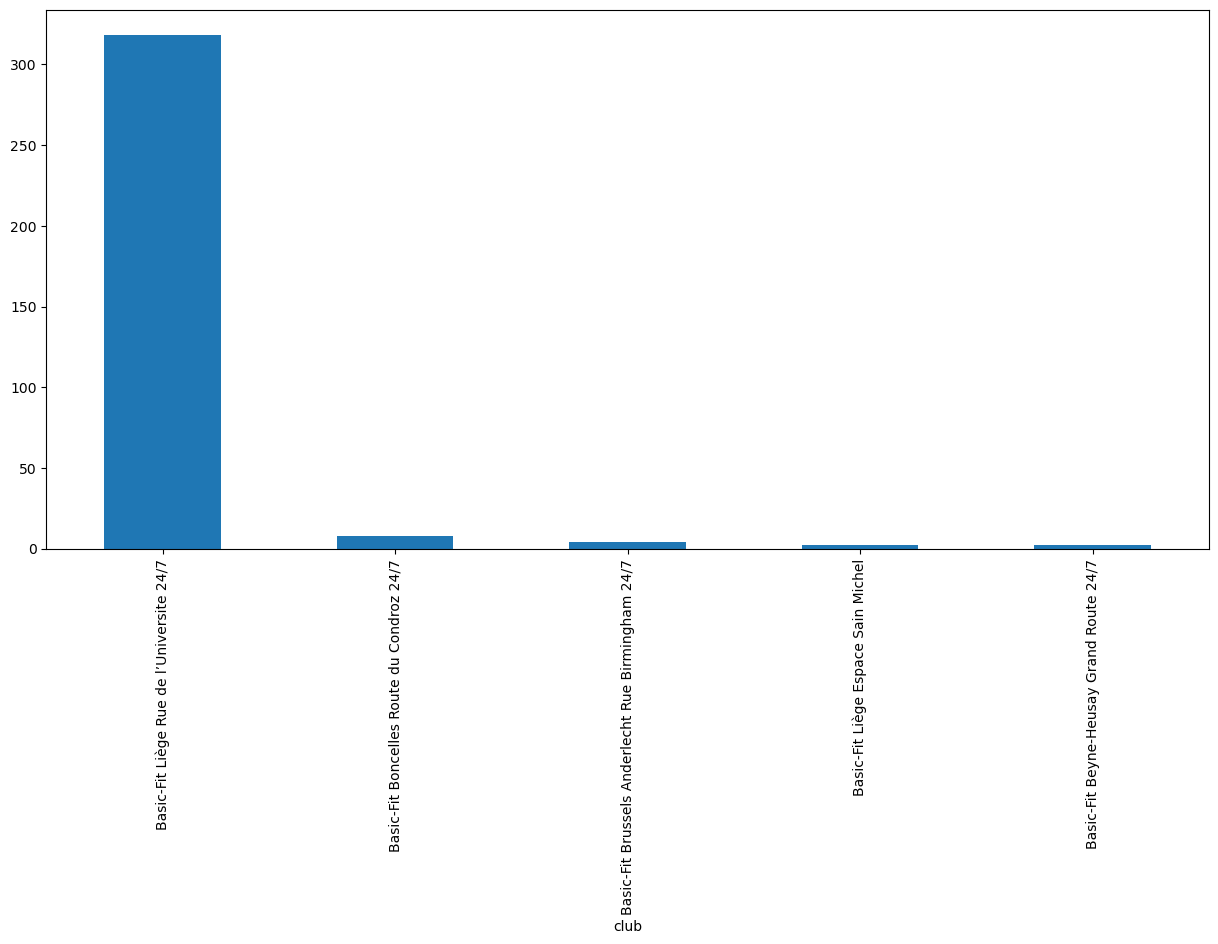

In [82]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(15, 7))
df2['club'].value_counts().plot(ax=ax, kind='bar')


<Axes: xlabel='datetime'>

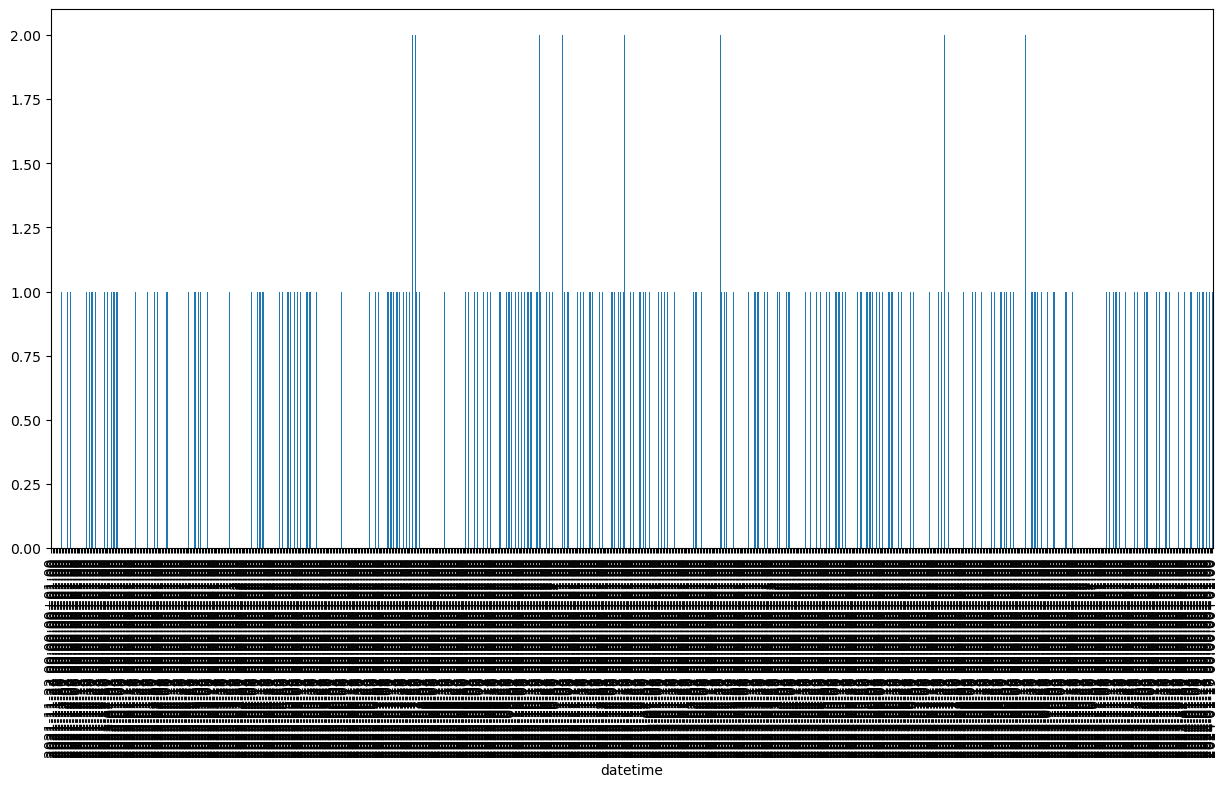

In [84]:
# Plot for each day the number of visits no matter the club
fig, ax = plt.subplots(figsize=(15, 7))
df2_gb = df2.groupby(pd.Grouper(key='datetime', freq='1D'))
df2_gb['club'].count().plot(ax=ax, kind='bar')

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

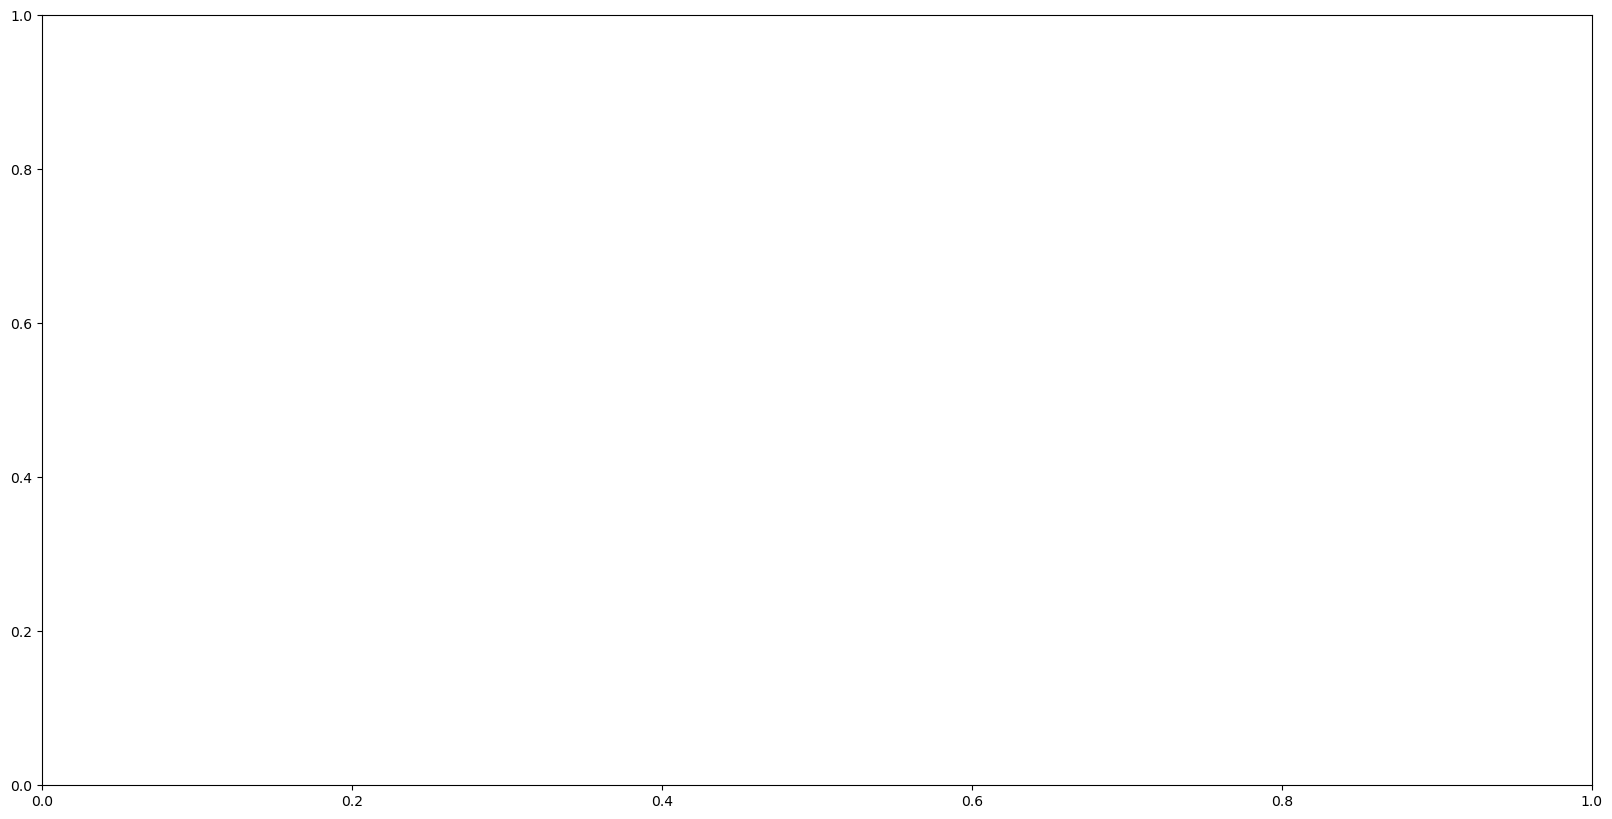

In [88]:
import calmap
plt.figure(figsize=(20,10))
data = df2.groupby(pd.Grouper(key='datetime', freq='1D')).count()['club']
calmap.yearplot(df2['club'], cmap='YlGn', fillcolor='lightgrey',daylabels='MTWTFSS',dayticks=[0, 2, 4, 6],
               linewidth=2)